In [1]:
%matplotlib inline

In [2]:
from tqdm import tqdm_notebook

In [3]:
import pandas as pd
from matplotlib import pyplot as plt

In [4]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import roc_auc_score, roc_curve

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [5]:
train = pd.read_csv('train.csv', index_col='ID')

In [6]:
train.head()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
ID,,,,,,,,,,,,,,,,,,,,,
1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [7]:
train.info(verbose=True, memory_usage=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76020 entries, 1 to 151838
Data columns (total 370 columns):
var3                             76020 non-null int64
var15                            76020 non-null int64
imp_ent_var16_ult1               76020 non-null float64
imp_op_var39_comer_ult1          76020 non-null float64
imp_op_var39_comer_ult3          76020 non-null float64
imp_op_var40_comer_ult1          76020 non-null float64
imp_op_var40_comer_ult3          76020 non-null float64
imp_op_var40_efect_ult1          76020 non-null float64
imp_op_var40_efect_ult3          76020 non-null float64
imp_op_var40_ult1                76020 non-null float64
imp_op_var41_comer_ult1          76020 non-null float64
imp_op_var41_comer_ult3          76020 non-null float64
imp_op_var41_efect_ult1          76020 non-null float64
imp_op_var41_efect_ult3          76020 non-null float64
imp_op_var41_ult1                76020 non-null float64
imp_op_var39_efect_ult1          76020 non-null float

# Machine learning

In [8]:
y = train['TARGET']

In [9]:
train = train.drop('TARGET', axis=1)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.3)

## DecisionTreeClassifier

In [11]:
depths = []
roc_aucs = []
predicts = []

for i in tqdm_notebook(range(1, 50, 5)):
    dtc = DecisionTreeClassifier(max_depth=i)
    dtc.fit(X_train, y_train)
    
    y_pred = dtc.predict(X_test)
    roc_auc = roc_auc_score(y_test, y_pred)
    depths.append(i)
    roc_aucs.append(roc_auc)
    predicts.append(dtc.predict_proba(X_test)[:,1])

HBox(children=(IntProgress(value=0, max=10), HTML(value='')))

(-0.01, 1.01)

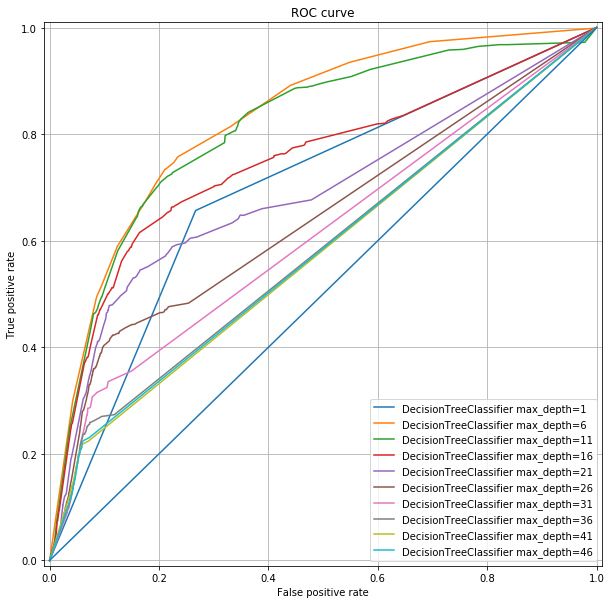

In [12]:
_, ax = plt.subplots(figsize=(10, 10))

for index, predict in enumerate(predicts):
    fpr, tpr, thresholds = roc_curve(y_test, predict)
    plt.plot(fpr, tpr, label=f'DecisionTreeClassifier max_depth={depths[index]}')

ax.legend()


plt.plot([0, 1], [0, 1])

plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.grid(True)

plt.title('ROC curve')

plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

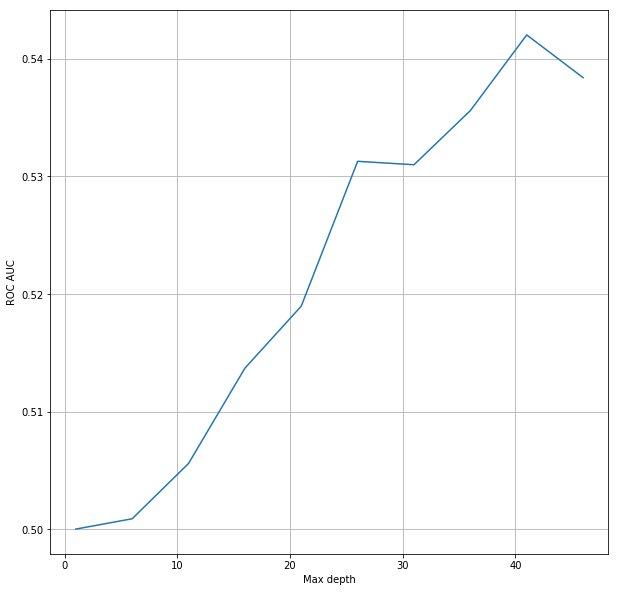

In [13]:
plt.subplots(figsize=(10, 10))

plt.plot(depths, roc_aucs)

plt.ylabel('ROC AUC')
plt.xlabel('Max depth')
plt.grid(True)

plt.show()

## KNeighborsClassifier

In [14]:
neighbors = []
roc_aucs = []
predicts = []

X_train_, X_test_, y_train_, y_test_ = train_test_split(train.iloc[:, :100], y, test_size=0.3)

for i in tqdm_notebook(range(1, 50, 3)):
    knc = KNeighborsClassifier(n_neighbors=i, n_jobs=-1)
    knc.fit(X_train_, y_train_)
    
    y_pred = knc.predict(X_test_)
    roc_auc = roc_auc_score(y_test_, y_pred)
    neighbors.append(i)
    roc_aucs.append(roc_auc)
    predicts.append(knc.predict_proba(X_test_)[:,1])

HBox(children=(IntProgress(value=0, max=17), HTML(value='')))

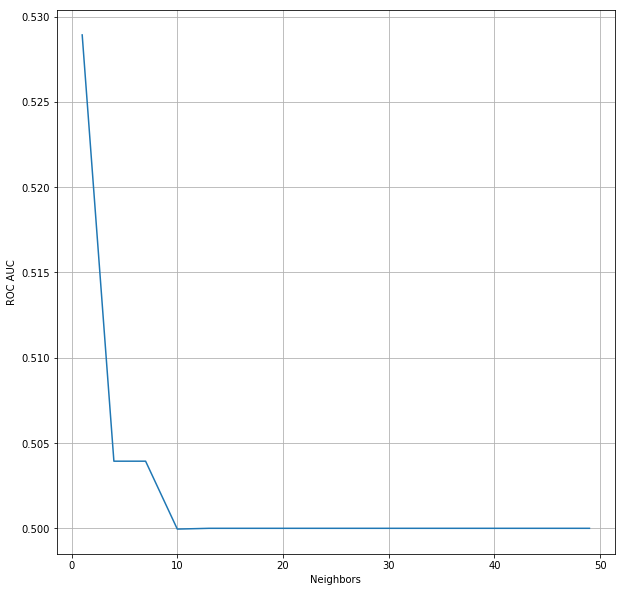

In [15]:
plt.subplots(figsize=(10, 10))

plt.plot(neighbors, roc_aucs)

plt.ylabel('ROC AUC')
plt.xlabel('Neighbors')
plt.grid(True)

plt.show()

(-0.01, 1.01)

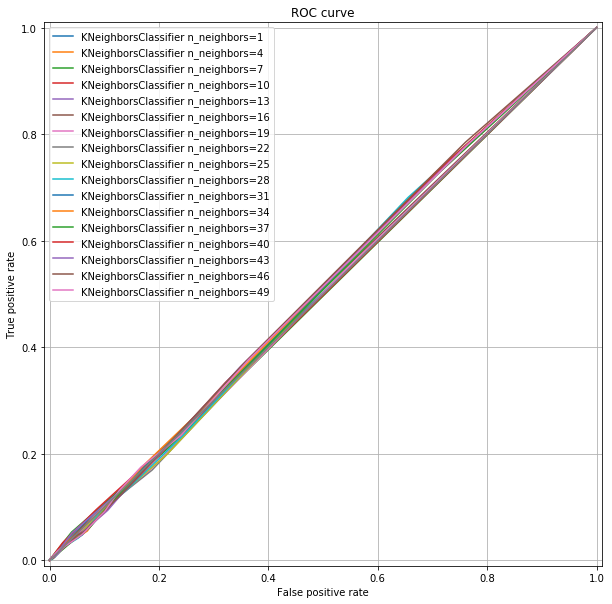

In [16]:
_, ax = plt.subplots(figsize=(10, 10))

for index, predict in enumerate(predicts):
    fpr, tpr, thresholds = roc_curve(y_test, predict)
    plt.plot(fpr, tpr, label=f'KNeighborsClassifier n_neighbors={neighbors[index]}')

ax.legend()


plt.plot([0, 1], [0, 1])

plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.grid(True)

plt.title('ROC curve')

plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

## LogisticRegression

In [17]:
lr_1 = LogisticRegression(C=0.01, penalty='l1')
lr_1.fit(X_train, y_train)

lr_2 = LogisticRegression(C=0.01, penalty='l2')
lr_2.fit(X_train, y_train)

lr_3 = LogisticRegression(C=1, penalty='l1')
lr_3.fit(X_train, y_train)

lr_4 = LogisticRegression(C=1, penalty='l2')
lr_4.fit(X_train, y_train)

lr_5 = LogisticRegression(C=100, penalty='l1')
lr_5.fit(X_train, y_train)

lr_6 = LogisticRegression(C=100, penalty='l2')
lr_6.fit(X_train, y_train)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


(-0.01, 1.01)

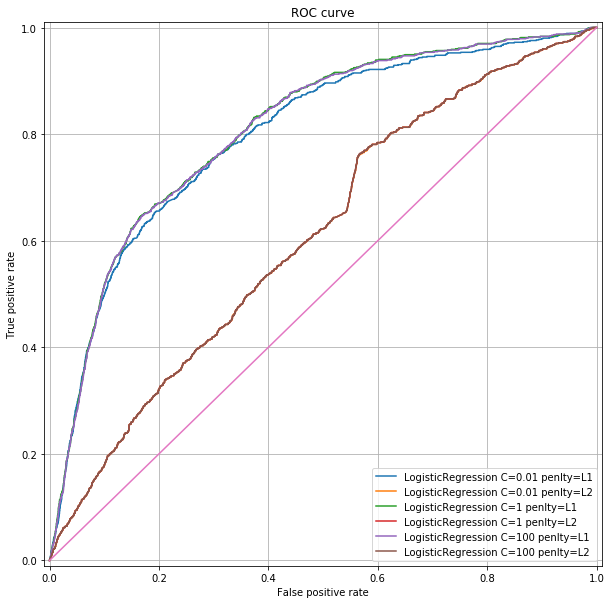

In [18]:
lr_1_proba = lr_1.predict_proba(X_test)
lr_2_proba = lr_2.predict_proba(X_test)
lr_3_proba = lr_3.predict_proba(X_test)
lr_4_proba = lr_4.predict_proba(X_test)
lr_5_proba = lr_5.predict_proba(X_test)
lr_6_proba = lr_6.predict_proba(X_test)

_, ax = plt.subplots(figsize=(10, 10))

fpr, tpr, thresholds = roc_curve(y_test, lr_1_proba[:,1])
plt.plot(fpr, tpr, label='LogisticRegression C=0.01 penlty=L1')

fpr, tpr, thresholds = roc_curve(y_test, lr_2_proba[:,1])
plt.plot(fpr, tpr, label='LogisticRegression C=0.01 penlty=L2')

fpr, tpr, thresholds = roc_curve(y_test, lr_3_proba[:,1])
plt.plot(fpr, tpr, label='LogisticRegression C=1 penlty=L1')

fpr, tpr, thresholds = roc_curve(y_test, lr_4_proba[:,1])
plt.plot(fpr, tpr, label='LogisticRegression C=1 penlty=L2')

fpr, tpr, thresholds = roc_curve(y_test, lr_5_proba[:,1])
plt.plot(fpr, tpr, label='LogisticRegression C=100 penlty=L1')

fpr, tpr, thresholds = roc_curve(y_test, lr_6_proba[:,1])
plt.plot(fpr, tpr, label='LogisticRegression C=100 penlty=L2')

ax.legend()


plt.plot([0, 1], [0, 1])

plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.grid(True)

plt.title('ROC curve')

plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))